In [14]:
import pandas as pd
import os , sys
import yaml
notebook_dir = os.getcwd()

sys.path.append(os.path.abspath(os.path.join(notebook_dir, '..')))

In [7]:
import sys
import os

# Add the 'scripts' directory to the Python path
sys.path.append(os.path.abspath('../scripts'))

from data_loader import load_data, inspect_data, handle_missing_values, load_config


In [29]:
from data_loader import load_data, inspect_data, handle_missing_values, load_config

# Load configuration with the correct path
config = load_config(config_file='../config.yaml')

# Step 1: Load Dataset
data = load_data(config['dataset_path'])

# Step 2: Inspect Dataset
inspect_data(data)

# Step 3: Handle Missing Values
data_cleaned = handle_missing_values(data)

print(data.columns)


Dataset loaded successfully with 1048575 rows and 6 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1048575 non-null  int64 
 1   headline    1048575 non-null  object
 2   url         1048575 non-null  object
 3   publisher   1048575 non-null  object
 4   date        1048575 non-null  object
 5   stock       1048575 non-null  object
dtypes: int64(1), object(5)
memory usage: 48.0+ MB
None
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                          

In [36]:

from data_loader import load_data
from eda_statistics import analyze_text_length, articles_per_publisher, analyze_publication_dates

# Load the dataset
data = pd.read_csv(config['dataset_path'])

#Analyze text lengths of the 'headline' column
analyze_text_length(data_cleaned, "headline")

print("\n")

# Count articles per publisher
articles_per_publisher(data_cleaned)

print("\n")

# Analyze publication trends over time
data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True, errors='coerce')
date_counts = data['date'].value_counts().sort_index()
print("Publication trends:\n", date_counts)

Basic statistics for text lengths:
 count    1.048575e+06
mean     7.300076e+01
std      4.029646e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: text_length, dtype: float64


Articles per publisher:
 publisher
Paul Quintaro                 168435
Lisa Levin                    139785
Benzinga Newsdesk             111281
Charles Gross                  72892
Monica Gerson                  61374
                               ...  
Silvio Tavares                     1
Matthew Boesler                    1
Bull Market Bear                   1
vic@forextraininggroup.com         1
Ryan Smith                         1
Name: count, Length: 984, dtype: int64


Publication trends:
 date
2011-04-27 21:01:48-04:00    1
2011-04-28 13:49:29-04:00    1
2011-04-28 15:00:36-04:00    1
2011-04-29 13:47:06-04:00    1
2011-04-29 16:11:05-04:00    1
                            ..
2020-06-11 16:15:38-04:00    1
2020-06-11 16:24:41-04:00 

C:\Users\user\AppData\Local\Temp\ipykernel_10624\1361415383.py:18: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True, errors='coerce')


In [39]:
#Sentimental Analysis

from sentiment import sentiment_analysis, keyword_extraction

# Sentiment Analysis
sentiment_analysis(data_cleaned, "headline")

# Keyword Extraction
keyword_extraction(data_cleaned, "headline")


Sentiment analysis completed.
                                            headline  sentiment
0            Stocks That Hit 52-Week Highs On Friday        0.0
1         Stocks That Hit 52-Week Highs On Wednesday        0.0
2                      71 Biggest Movers From Friday        0.0
3       46 Stocks Moving In Friday's Mid-Day Session        0.0
4  B of A Securities Maintains Neutral on Agilent...        0.0
Top keywords:
 ['earnings' 'eps' 'est' 'market' 'reports' 'sales' 'shares' 'stocks'
 'update' 'vs']


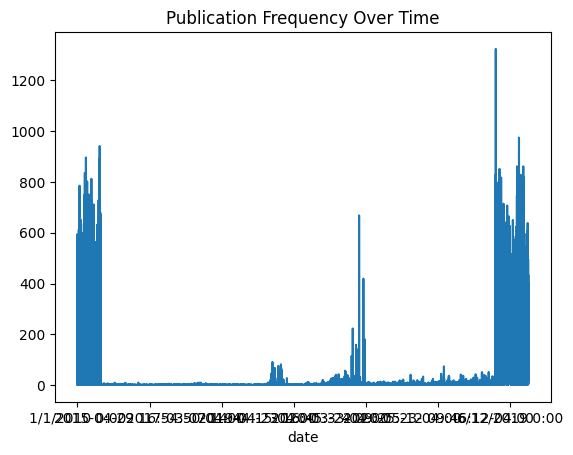

In [47]:
#Time analysis
from time_series import publication_frequency

# Publication Frequency Analysis
publication_frequency(data_cleaned)

In [56]:
from publisher_ana import publisher_contributions, domain_analysis

# Publisher Contributions
publisher_contributions(data_cleaned)

# Domain Analysis
domain_analysis(data_cleaned)


Publisher contributions:
 publisher
Paul Quintaro                 168435
Lisa Levin                    139785
Benzinga Newsdesk             111281
Charles Gross                  72892
Monica Gerson                  61374
                               ...  
Silvio Tavares                     1
Matthew Boesler                    1
Bull Market Bear                   1
vic@forextraininggroup.com         1
Ryan Smith                         1
Name: count, Length: 984, dtype: int64
Unique domains:
 domain
benzinga.com              5976
gmail.com                   96
andyswan.com                 4
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64
